In [3]:
#import libraries
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import requests
import time
import json

## Pytrends for Google Trends

In [175]:
from pytrends.request import TrendReq

# Login to Google. Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

## Bitcoin trends vs price

In [176]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['Bitcoin'], timeframe='2017-03-14 2018-03-15')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head(5))

            Bitcoin isPartial
date                         
2017-03-19        6     False
2017-03-26        5     False
2017-04-02        5     False
2017-04-09        5     False
2017-04-16        5     False


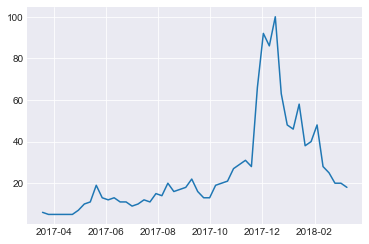

In [177]:
sns.set_style("darkgrid")
plt.plot(interest_over_time_df.Bitcoin)
plt.show()

In [178]:
# CryptoCompare API call for historical Hours 
url = 'https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=52&aggregate=7&e=Poloniex'
response = requests.post(url)
data = json.loads(response.content)
df = pd.DataFrame.from_dict(data["Data"], orient="columns")
df = pd.DataFrame(df)

df['time'] = pd.to_datetime(df['time'],unit='s')
df.head(10)

,close,high,low,open,time,volumefrom,volumeto
0,1037.70,1265.20,935.00,1255.01,2017-03-16,85526.59,9.139679e+07
1,1040.00,1066.00,888.99,1037.70,2017-03-23,64621.43,6.399996e+07
2,1140.00,1164.44,1022.00,1040.00,2017-03-30,72454.47,7.999520e+07
3,1227.00,1246.17,1137.24,1140.00,2017-04-06,44320.92,5.316625e+07
4,1262.89,1293.00,1161.00,1227.00,2017-04-13,38220.99,4.683522e+07
5,1398.63,1412.93,1260.00,1262.89,2017-04-20,38516.33,5.151750e+07
6,1615.62,1628.89,1369.55,1398.63,2017-04-27,60314.59,8.912494e+07
7,1800.00,1816.39,1454.12,1615.62,2017-05-04,118427.26,1.952169e+08
8,1873.00,1901.00,1652.01,1800.00,2017-05-11,75726.17,1.361867e+08
9,2389.00,2448.00,1852.29,1873.00,2017-05-18,80097.80,1.677160e+08


In [179]:
price = df.loc[:,['time','close']]
price = price.loc[0:51,:]
price['interest'] = interest_over_time_df.Bitcoin.values
price = price.drop('close',axis=1)
price.tail()

,time,interest
47,2018-02-08,28
48,2018-02-15,25
49,2018-02-22,20
50,2018-03-01,20
51,2018-03-08,18


In [180]:
scaled = price.loc[:,['price','interest']]
scaled -= scaled.min()  # equivalent to df = df - df.min()
scaled /= scaled.max()

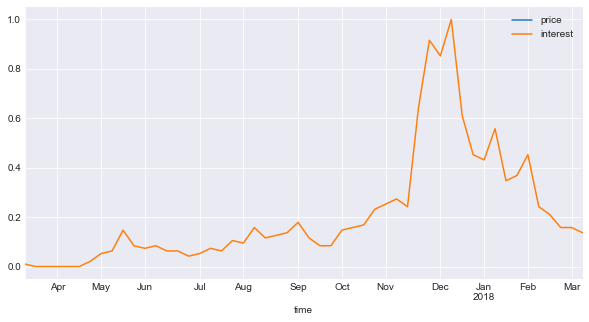

In [181]:
temp = pd.concat([scaled, price['time']], axis=1)
temp.set_index('time').plot(figsize=(10,5), grid=True) 

## Function returning a scaled dataframe of price and interest values

In [206]:
def get_scaled_weekly_price_interest(keyword, coin):
    # Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
    pytrend.build_payload(kw_list=[keyword], timeframe='2017-03-14 2018-03-15')

    # Interest Over Time
    interest_over_time_df = pytrend.interest_over_time()
    print(interest_over_time_df.head(5))

    # CryptoCompare API call for historical days 
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym=USD&limit=52&aggregate=7&e=Poloniex'
    response = requests.post(url.format(coin))
    data = json.loads(response.content)
    df = pd.DataFrame.from_dict(data["Data"], orient="columns")
    df = pd.DataFrame(df)

    df['time'] = pd.to_datetime(df['time'],unit='s')

    price = df.loc[:,['time','close']]
    price = price.loc[0:51,:]
    price['interest'] = interest_over_time_df[keyword].values
    price['price'] = price['close']
    price = price.drop('close',axis=1)

    scaled = price.loc[:,['price','interest']]
    scaled -= scaled.min()  # equivalent to df = df - df.min()
    scaled /= scaled.max()

    df_concat = pd.concat([scaled, price['time']], axis=1)

    return df_concat

## Interests vs Prices

            Monero isPartial
date                        
2017-03-19       8     False
2017-03-26       6     False
2017-04-02       5     False
2017-04-09       6     False
2017-04-16       6     False


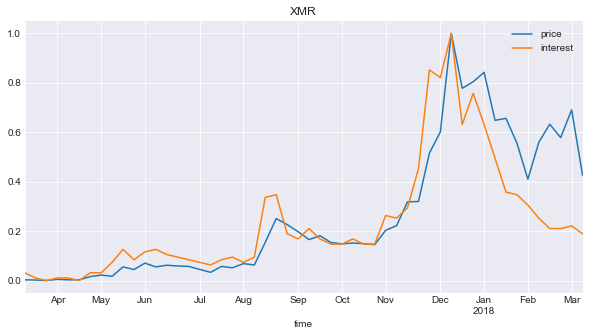

In [268]:
df_xmr = get_scaled_weekly_price_interest('Monero','XMR')
df_xmr.set_index('time').plot(figsize=(10,5), grid=True, title='XMR') 

            Zcash isPartial
date                       
2017-03-19     13     False
2017-03-26      9     False
2017-04-02     10     False
2017-04-09     12     False
2017-04-16     11     False


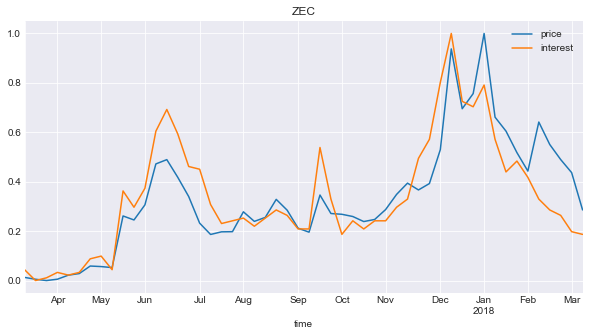

In [269]:
df_zec = get_scaled_weekly_price_interest('Zcash','ZEC')
df_zec.set_index('time').plot(figsize=(10,5), grid=True, title='ZEC') 

            Bitcoin isPartial
date                         
2017-03-19        6     False
2017-03-26        5     False
2017-04-02        5     False
2017-04-09        5     False
2017-04-16        5     False


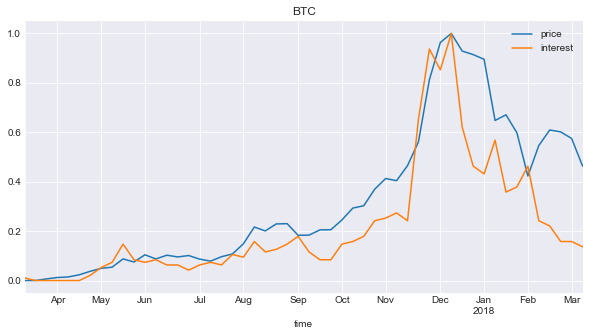

In [270]:
df_btc = get_scaled_weekly_price_interest('Bitcoin','BTC')
df_btc.set_index('time').plot(figsize=(10,5), grid=True, title='BTC') 

            Ethereum Classic isPartial
date                                  
2017-03-19                14     False
2017-03-26                11     False
2017-04-02                 8     False
2017-04-09                 7     False
2017-04-16                11     False


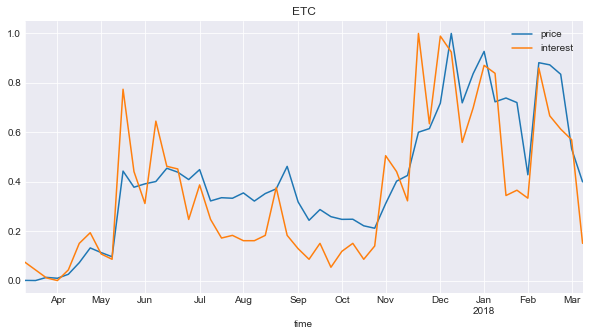

In [271]:
df_etc = get_scaled_weekly_price_interest('Ethereum Classic','ETC')
df_etc.set_index('time').plot(figsize=(10,5), grid=True, title='ETC')

## Correlation between coins and interests

In [272]:
df_merge = pd.DataFrame()
df_merge = pd.concat([df_btc.loc[:,['price','interest']], 
                      df_etc.loc[:,['price','interest']], 
                       df_xmr.loc[:,['price','interest']], 
                       df_zec.loc[:,['price','interest']]], axis=1)

df_merge.columns = ['btc_price','btc_interest','etc_price','etc_interest','xmr_price','xmr_interest','zec_price','zec_interest']
df_merge.head()

,btc_price,btc_interest,etc_price,etc_interest,xmr_price,xmr_interest,zec_price,zec_interest
0,0.000000,0.010526,0.000544,0.075269,0.002944,0.031579,0.012743,0.043956
1,0.000149,0.000000,0.000000,0.043011,0.002109,0.010526,0.005204,0.000000
2,0.006629,0.000000,0.012789,0.010753,0.000000,0.000000,0.000000,0.010989
3,0.012266,0.000000,0.009252,0.000000,0.004922,0.010526,0.005387,0.032967
4,0.014592,0.000000,0.025306,0.043011,0.002835,0.010526,0.021792,0.021978


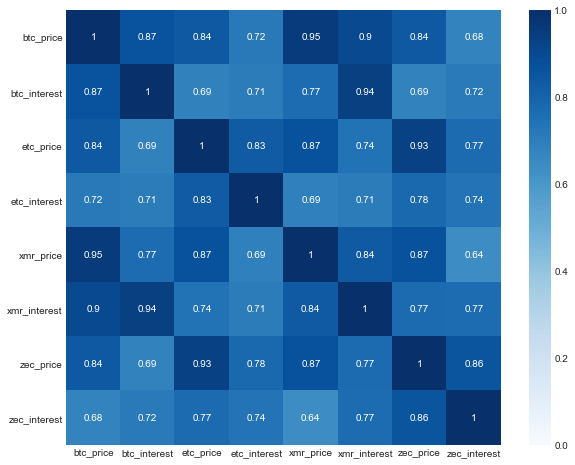

In [274]:
# Draw a correlation heatmap plot
f, ax = plt.subplots(figsize=(10, 8))

corr = df_merge.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Blues',
           square=True, vmin=0, vmax=1, ax=ax, annot=True)

## Hourly data

In [253]:
def get_scaled_hourly_price_interest(keyword, coin):
    # Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
    pytrend.build_payload(kw_list=[keyword], timeframe='now 7-d')

    # Interest Over Time
    interest_over_time_df = pytrend.interest_over_time()
    print(interest_over_time_df.head(5))

    # CryptoCompare API call for historical Hours 
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym=USD&limit={}&aggregate=1&e=Poloniex'
    response = requests.post(url.format(coin, interest_over_time_df.shape[0]-1))
    data = json.loads(response.content)
    df = pd.DataFrame.from_dict(data["Data"], orient="columns")
    df = pd.DataFrame(df)

    df['time'] = pd.to_datetime(df['time'],unit='s')

    price = df.loc[:,['time','close']]
    price['interest'] = interest_over_time_df[keyword].values
    price['price'] = price['close']
    price = price.drop('close',axis=1)

    scaled = price.loc[:,['price','interest']]
    scaled -= scaled.min()  # equivalent to df = df - df.min()
    scaled /= scaled.max()

    df_concat = pd.concat([scaled, price['time']], axis=1)

    return df_concat

                     Bitcoin isPartial
date                                  
2018-03-09 15:00:00       66     False
2018-03-09 16:00:00       68     False
2018-03-09 17:00:00       69     False
2018-03-09 18:00:00       64     False
2018-03-09 19:00:00       67     False


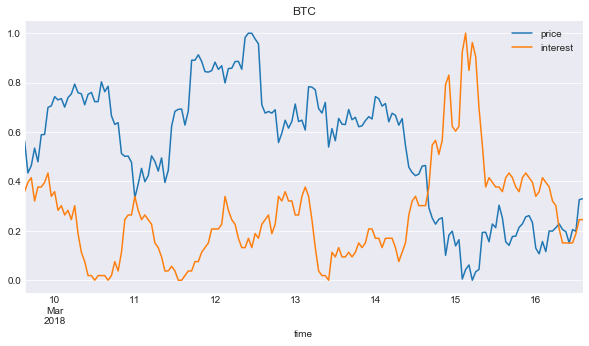

In [275]:
df_btc = get_scaled_hourly_price_interest('Bitcoin','BTC')
df_btc.set_index('time').plot(figsize=(10,5), grid=True, title='BTC') 

                     Ethereum isPartial
date                                   
2018-03-09 15:00:00        61     False
2018-03-09 16:00:00        59     False
2018-03-09 17:00:00        59     False
2018-03-09 18:00:00        58     False
2018-03-09 19:00:00        62     False


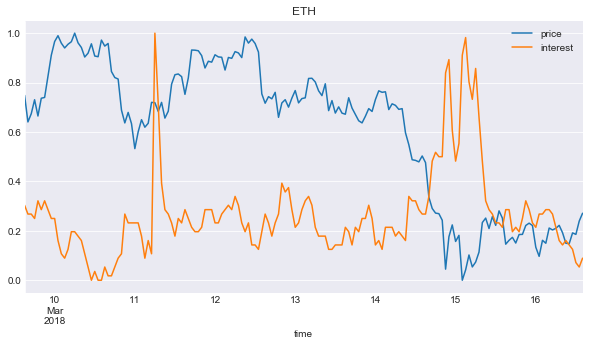

In [276]:
df_eth = get_scaled_hourly_price_interest('Ethereum','ETH')
df_eth.set_index('time').plot(figsize=(10,5), grid=True, title='ETH') 

                     Monero isPartial
date                                 
2018-03-09 15:00:00      50     False
2018-03-09 16:00:00      49     False
2018-03-09 17:00:00      50     False
2018-03-09 18:00:00      53     False
2018-03-09 19:00:00      51     False


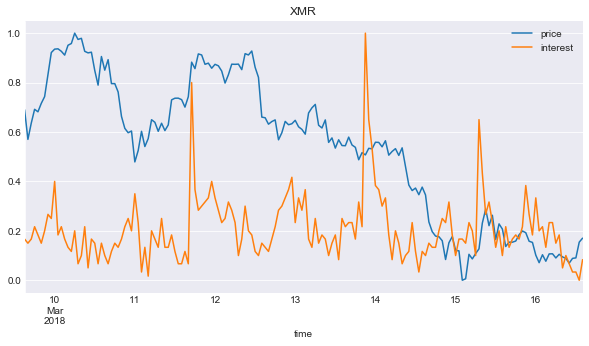

In [277]:
df_xmr = get_scaled_hourly_price_interest('Monero','XMR')
df_xmr.set_index('time').plot(figsize=(10,5), grid=True, title='XMR') 

                     Zcash isPartial
date                                
2018-03-09 15:00:00     74     False
2018-03-09 16:00:00     66     False
2018-03-09 17:00:00     80     False
2018-03-09 18:00:00     76     False
2018-03-09 19:00:00     78     False


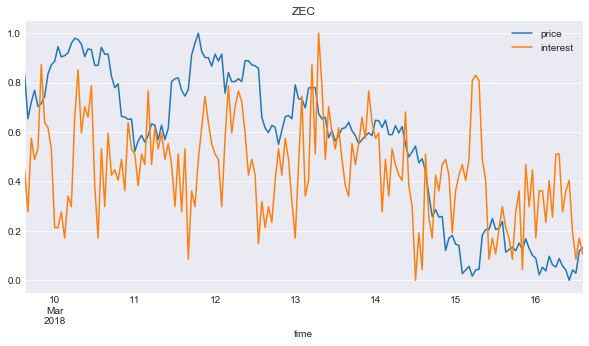

In [278]:
df_zec = get_scaled_hourly_price_interest('Zcash','ZEC')
df_zec.set_index('time').plot(figsize=(10,5), grid=True, title='ZEC') 

In [279]:
df_merge = pd.DataFrame()
df_merge = pd.concat([df_btc.loc[:,['price','interest']], 
                      df_etc.loc[:,['price','interest']], 
                       df_xmr.loc[:,['price','interest']], 
                       df_zec.loc[:,['price','interest']]], axis=1)

df_merge.columns = ['btc_price','btc_interest','etc_price','etc_interest','xmr_price','xmr_interest','zec_price','zec_interest']
df_merge.head()

,btc_price,btc_interest,etc_price,etc_interest,xmr_price,xmr_interest,zec_price,zec_interest
0,0.564456,0.358491,0.000544,0.075269,0.690153,0.166667,0.836560,0.446809
1,0.434508,0.396226,0.000000,0.043011,0.570090,0.150000,0.653526,0.276596
2,0.463546,0.415094,0.012789,0.010753,0.635703,0.166667,0.720286,0.574468
3,0.534771,0.320755,0.009252,0.000000,0.691838,0.216667,0.768509,0.489362
4,0.479478,0.377358,0.025306,0.043011,0.681727,0.183333,0.703039,0.531915


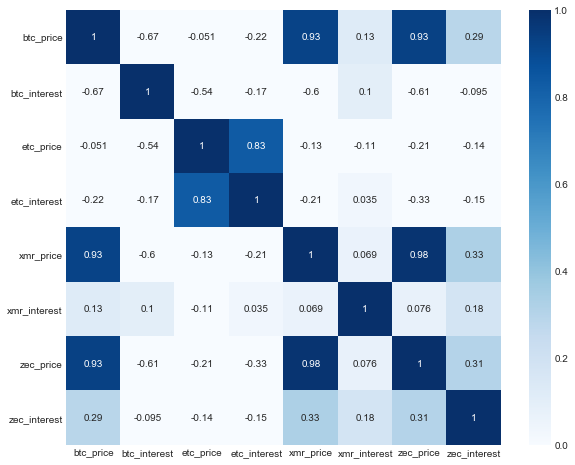

In [280]:
# Draw a correlation heatmap plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df_merge.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Blues',
           square=True, vmin=0, vmax=1, ax=ax, annot=True)